Importing Libraries and Dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

In [24]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Preprocessing and Visualization

In [25]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [26]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

C:\Users\barni\AppData\Local\Temp\ipykernel_51856\3727669803.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette="Set2")
C:\Users\barni\AppData\Local\Temp\ipykernel_51856\3727669803.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette="Set2")
C:\Users\barni\AppData\Local\Temp\ipykernel_51856\3727669803.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y.index, y=y.values, palette="Set2")
C:\Users\barni\AppData\Local\Temp\ipykernel_51856\3727669803.py:20: FutureWarning: 

Pas

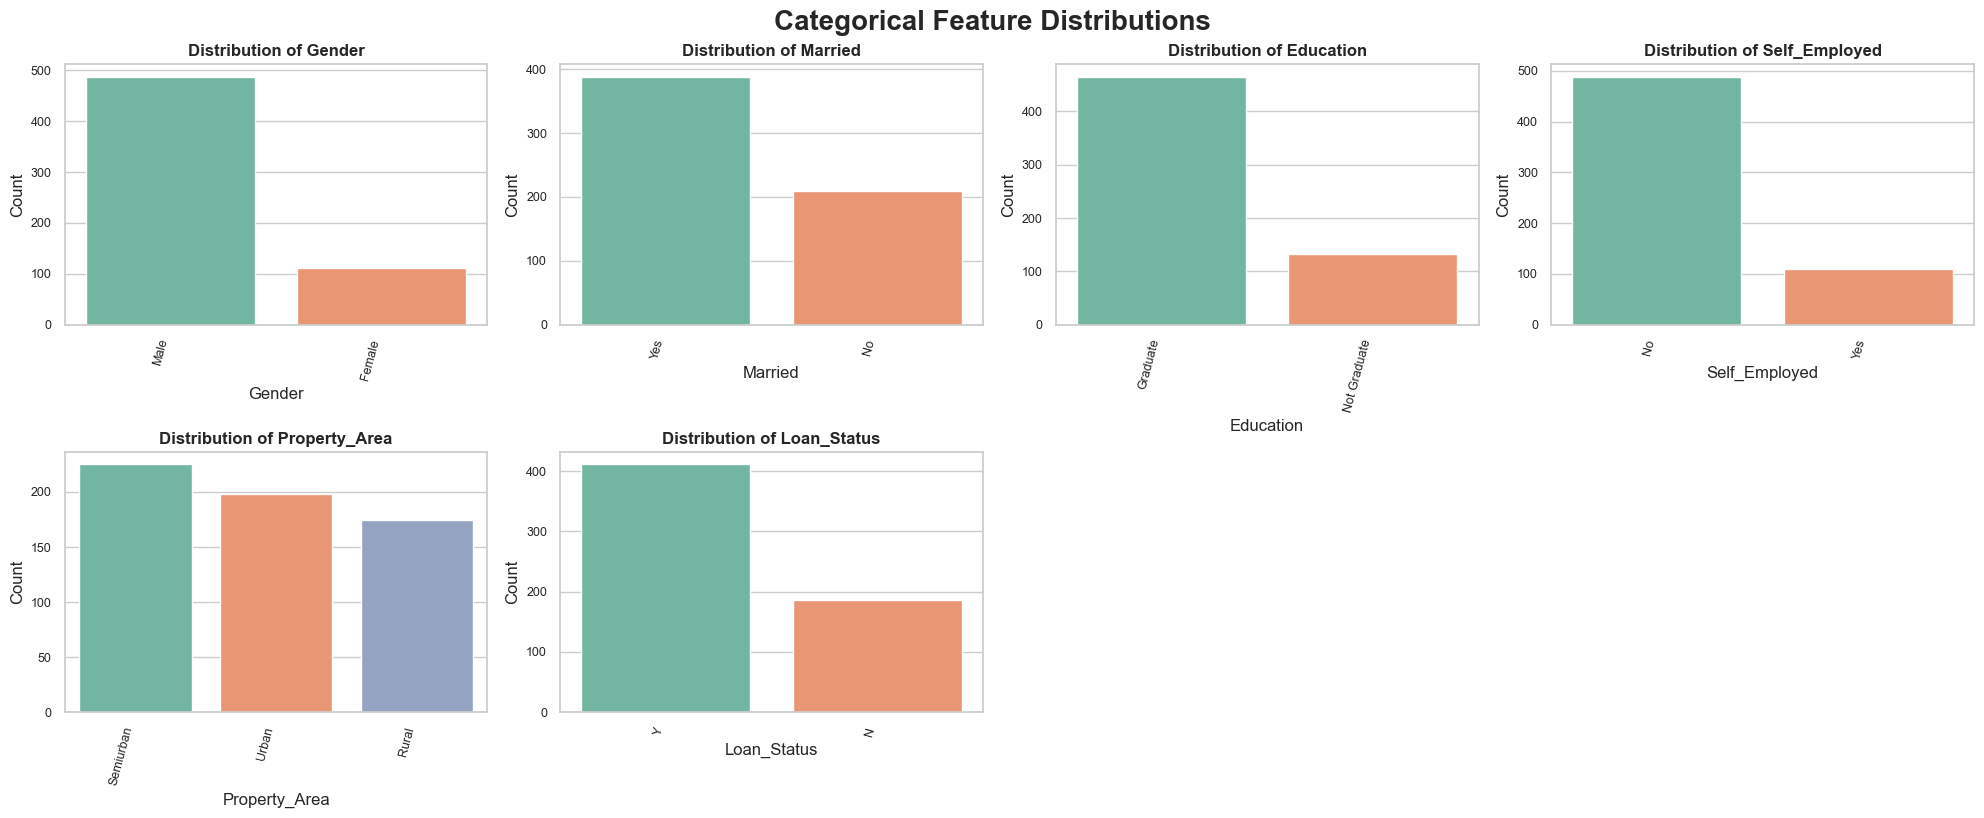

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid", palette="pastel")

# Identify object (categorical) columns
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)

# Plot setup
num_cols = 4
num_rows = -(-len(object_cols) // num_cols)  # Ceiling division
plt.figure(figsize=(5 * num_cols, 4 * num_rows))

# Iterate and plot each categorical column
for index, col in enumerate(object_cols, start=1):
    plt.subplot(num_rows, num_cols, index)
    y = data[col].value_counts().sort_values(ascending=False)
    sns.barplot(x=y.index, y=y.values, palette="Set2")
    
    plt.title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=75, ha='right', fontsize=9)
    plt.yticks(fontsize=9)

plt.tight_layout()
plt.suptitle('Categorical Feature Distributions', fontsize=20, fontweight='bold', y=1.02)
plt.show()


In [28]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [29]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


Correlation Heatmap

<Axes: >

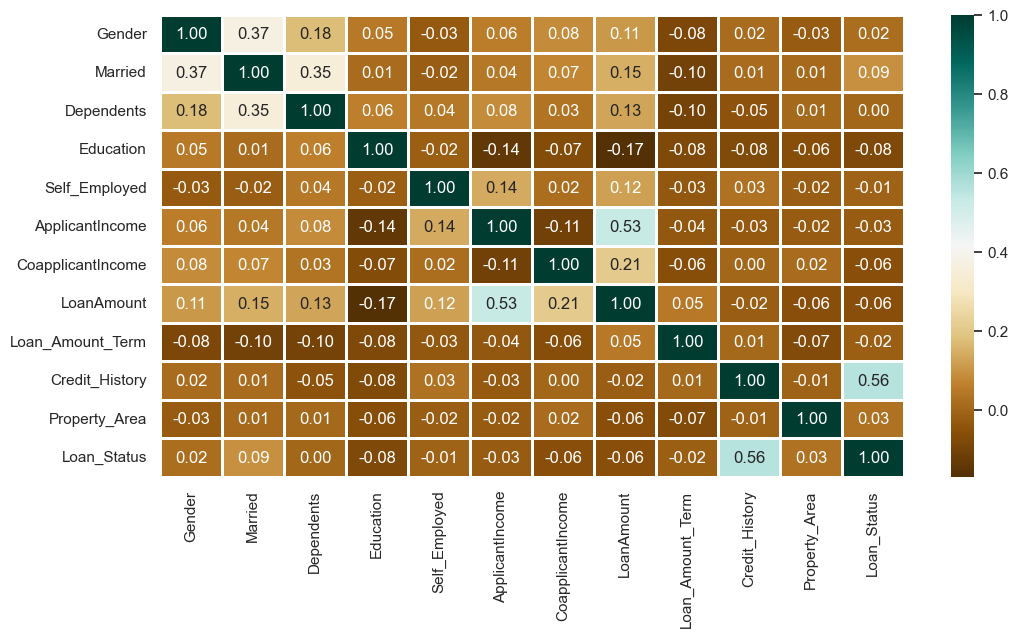

In [30]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'tight'

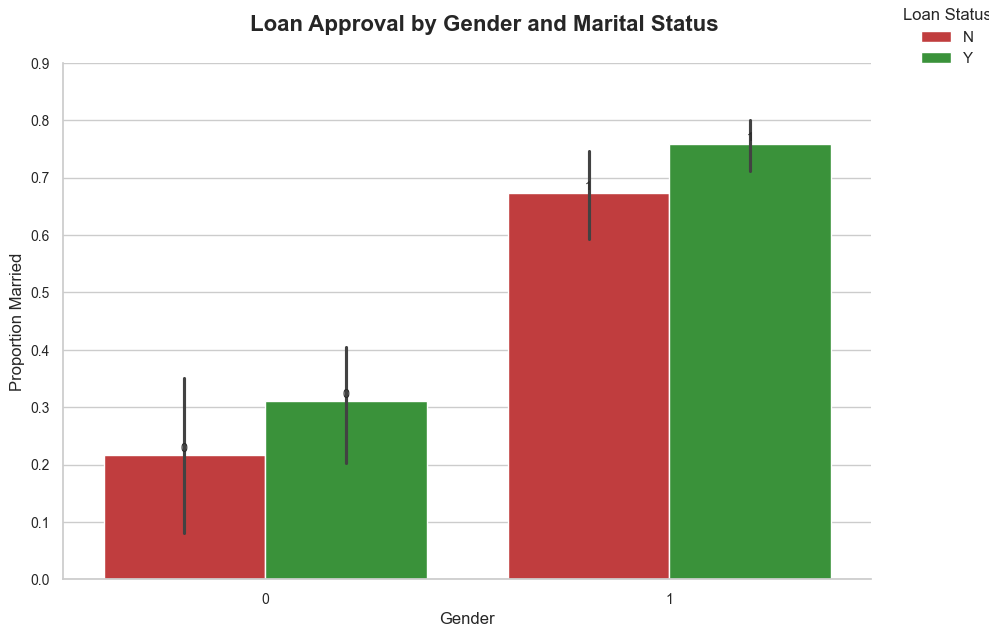

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Optional: map numeric Loan_Status values to 'Y'/'N' for readability
data['Loan_Status'] = data['Loan_Status'].map({1: 'Y', 0: 'N'})

# Set theme and color palette
sns.set_theme(style="whitegrid")
custom_palette = {"Y": "#2ca02c", "N": "#d62728"}  # Green for Approved, Red for Rejected

# Create the catplot
g = sns.catplot(
    x="Gender", 
    y="Married", 
    hue="Loan_Status", 
    kind="bar", 
    data=data,
    height=6, 
    aspect=1.5,
    palette=custom_palette
)

# Customize axes and title
g.set_axis_labels("Gender", "Proportion Married", fontsize=12)
g.fig.suptitle("Loan Approval by Gender and Marital Status", fontsize=16, fontweight='bold', y=1.05)

# Rotate x-ticks and adjust font size
g.set_xticklabels(rotation=0, fontsize=10)
g.set_yticklabels(fontsize=10)

# Add bar labels
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

# Adjust legend
g._legend.set_title("Loan Status")
g._legend.set_bbox_to_anchor((1, 1))

plt.tight


In [33]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean()) 
  
data.isna().sum()


TypeError: Could not convert string 'YNYYYYYNYNYYYNYYYNNYNYNNYYYNYNNNYNYNYYYNYYYYYYYNYYYNNNYYNYYYYNNNNNYYNYYYNYNNNNYYYNNYYYYYYYYYYYNYYYYYYYYYYNNYYYNYYYYYNYYYYYYYYNNYYYYYNNYNNNYYYYYYYNYNYNNYYYYYYYNNYYYNYNYYNYNYYNYNNNYNYYNYYYNNYYNYYYNYYNYYYYYYNNNYYYYNYNYNYYYYNNYYYYYYYYNYYYYNYYYNYYYYNNYYNYNNNNYYNYYYYYNYYYYYYYYYYYNYYYNYNYYYYNYNYYYYNNNYYYYNYNNYYYYYYYYYNYYYYYNYYNYYYYYYYYNYNNYYYYNYYYYNYNYYYNNYNYYYYNNNYNYYYNYYYYNYYYYYNYYNYYYYYYYYNYYNNNYYNYYYNNNYNYNYNNYYYNYNYYNYYYYNYYYYYNYYYYYYYYNNNNYNYYYYNYNYYYNYNYNYNYYYYYYNYYYYYYNNYNYYYYNYYYYNYYYNYYYYYNYYNNYYNNNYYYYNYYYYYYYNNYYYYNYYNYYYYNYNYNYYNNYYYYYYYYYNYYNNNYNYNNYYYYYNYNNNYYNYNYYYNNYYNYYYYNYYYYYYYN' to numeric